##**TRANSFER LEARNING**

##**IMPORT LIBRARY YANG DIBUTUHKAN**



In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import zipfile
import matplotlib.image as mpimg
import time
import numpy as np
import keras


from tensorflow import keras
from keras.preprocessing import image
from matplotlib import pyplot as plt
from google.colab import files
from keras.preprocessing import image
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras import layers
from keras.utils.vis_utils import plot_model


##**DATASET DAN DATALOADER**

In [6]:
local_zip = '/content/drive/MyDrive/DATASET/DATASET_PLD_V1.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')

zip_ref.close()

In [7]:
#DATA TRAINING
training_healthy = os.path.join('/content/DATASET_PLD_V1/Training/Healthy')
training_early_blight  = os.path.join('/content/DATASET_PLD_V1/Training/Early_Blight')
training_late_blight = os.path.join('/content/DATASET_PLD_V1/Training/Late_Blight')

#DATA VALIDATION
validation_healthy = os.path.join('/content/DATASET_PLD_V1/Validation/Healthy')
validation_early_blight = os.path.join('/content/DATASET_PLD_V1/Validation/Early_Blight')
validation_late_blight = os.path.join('/content/DATASET_PLD_V1/Validation/Late_Blight')

In [8]:
training_path = '/content/DATASET_PLD_V1/Training'
validation_path = '/content/DATASET_PLD_V1/Validation'
test_path = '/content/DATASET_PLD_V1/Testing'

##**EXPLORASI DATA**

In [9]:

#=============================================================#

print('\n DATA TRAINING \n')
training_healthy_names = os.listdir(training_healthy)
print(training_healthy_names[:10])

training_early_blight_names = os.listdir(training_early_blight)
print(training_early_blight_names[:10])

training_late_blight_names = os.listdir(training_late_blight)
print(training_late_blight_names[:10])

#=============================================================#

print('\n DATA VALIDATION \n')
validation_healthy_names = os.listdir(validation_healthy)
print(validation_healthy_names[:10])

validation_early_blight_names = os.listdir(validation_early_blight)
print(validation_early_blight_names[:10])

validation_late_blight_names = os.listdir(validation_late_blight)
print(validation_late_blight_names[:10])


 DATA TRAINING 

['Healthy_565.jpg', 'Healthy_357.jpg', 'Healthy_741.jpg', 'Healthy_555.jpg', 'Healthy_775.jpg', 'Healthy_211.jpg', 'Healthy_772.jpg', 'Healthy_641.jpg', 'Healthy_37.jpg', 'Healthy_370.jpg']
['Early_Blight_941.jpg', 'Early_Blight_31.jpg', 'Early_Blight_59.jpg', 'Early_Blight_320.jpg', 'Early_Blight_1039.jpg', 'Early_Blight_811.jpg', 'Early_Blight_172.jpg', 'Early_Blight_580.jpg', 'Early_Blight_633.jpg', 'Early_Blight_498.jpg']
['Late_Blight_66.jpg', 'Late_Blight_519.jpg', 'Late_Blight_84.jpg', 'Late_Blight_218.jpg', 'Late_Blight_40.jpg', 'Late_Blight_824.jpg', 'Late_Blight_75.jpg', 'Late_Blight_1030.jpg', 'Late_Blight_317.jpg', 'Late_Blight_915.jpg']

 DATA VALIDATION 

['Healthy_37.jpg', 'Healthy_34.jpg', 'Healthy_82.jpg', 'Healthy_92.jpg', 'Healthy_28.jpg', 'Healthy_78.jpg', 'Healthy_32.jpg', 'Healthy_2.jpg', 'Healthy_64.jpg', 'Healthy_41.jpg']
['Early_Blight_31.jpg', 'Early_Blight_59.jpg', 'Early_Blight_33.jpg', 'Early_Blight_15.jpg', 'Early_Blight_24.jpg', 'Early_B

In [10]:
print('total training PLD Healthy images:', len(os.listdir(training_healthy)))
print('total training PLD Early Blight images:', len(os.listdir(training_early_blight)))
print('total training PLD Late Blight images:', len(os.listdir(training_late_blight)),'\n')

print('total validation PLD Healthy images:', len(os.listdir(validation_healthy)))
print('total validation PLD Early Blight images:', len(os.listdir(validation_early_blight)))
print('total validation PLD Late Blight images:', len(os.listdir(validation_late_blight)),'\n')


total training PLD Healthy images: 816
total training PLD Early Blight images: 816
total training PLD Late Blight images: 816 

total validation PLD Healthy images: 102
total validation PLD Early Blight images: 102
total validation PLD Late Blight images: 102 



In [11]:
%matplotlib inline

# Parameters for our graph; we'll output images in a 5x5 configuration
nrows = 5
ncols = 5

# Index for iterating over images
pic_index = 0

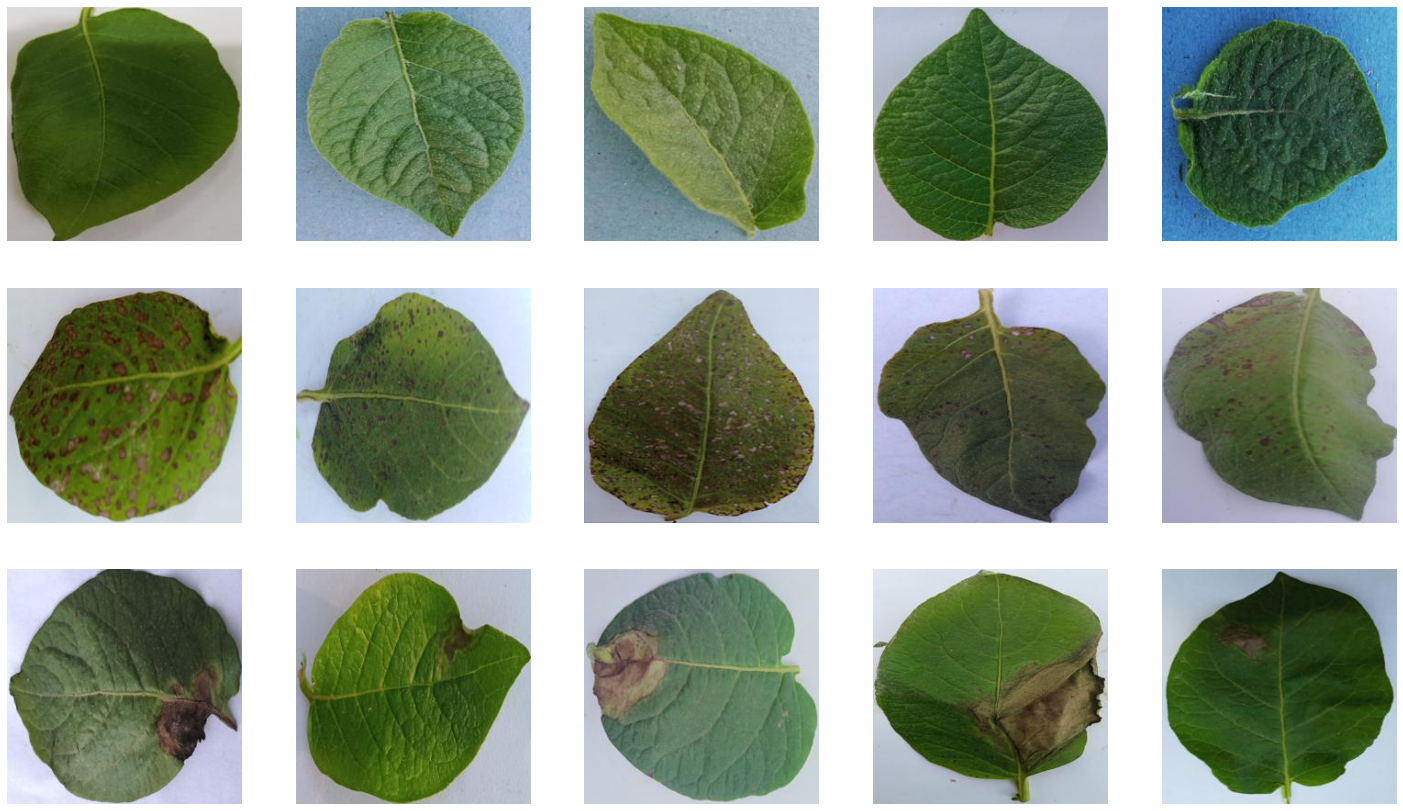

In [12]:
fig = plt.gcf()
fig.set_size_inches(ncols * 5, nrows * 5)

pic_index += 10

train_hl_pic = [os.path.join(training_healthy, fname)
                for fname in training_healthy_names[pic_index-5:pic_index]]
train_eb_pic = [os.path.join(training_early_blight, fname)
                for fname in training_early_blight_names[pic_index-5:pic_index]]
train_lb_pic = [os.path.join(training_late_blight, fname)
                for fname in training_late_blight_names[pic_index-5:pic_index]]

for i, img_path in enumerate(train_hl_pic + train_eb_pic + train_lb_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  

  img = mpimg.imread(img_path)
  plt.axis('off')
  plt.imshow(img)

plt.show()


##**DATA AUGMENTASI**

In [13]:
#DATA AUGMENTASI UNTUK INCEPTION V3 dan VGG19
train_datagenDA = ImageDataGenerator(rescale = 1/255.,rotation_range = 40, 
                                  brightness_range = [1,2],
                                  zoom_range = 0.1,
                                   horizontal_flip = True)

valid_datagenDA = ImageDataGenerator(rescale = 1/255)
test_datagenDA = ImageDataGenerator(rescale = 1/255)


#DATA AUGMENTASI UNTUK RESNET50
train_datagen_pi = ImageDataGenerator(preprocessing_function=preprocess_input,rotation_range = 40, 
                                  brightness_range = [1,2],
                                  zoom_range = 0.1,
                                   horizontal_flip = True )

valid_datagen_pi = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen_pi = ImageDataGenerator(preprocessing_function=preprocess_input)

In [14]:
image_sample_path = '/content/DATASET_PLD_V1/Testing/Healthy/Healthy_2.jpg'

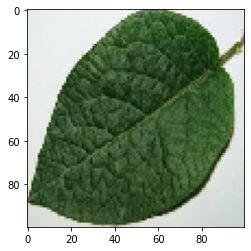

In [15]:
 #Loads image in from the set image path
img = keras.preprocessing.image.load_img(image_sample_path, target_size= (100,100))
img_tensor = keras.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
#Allows us to properly visualize our image by rescaling values in array
img_tensor /= 255.
#Plots image
plt.figure(figsize=(8,4))
plt.imshow(img_tensor[0])
plt.show()

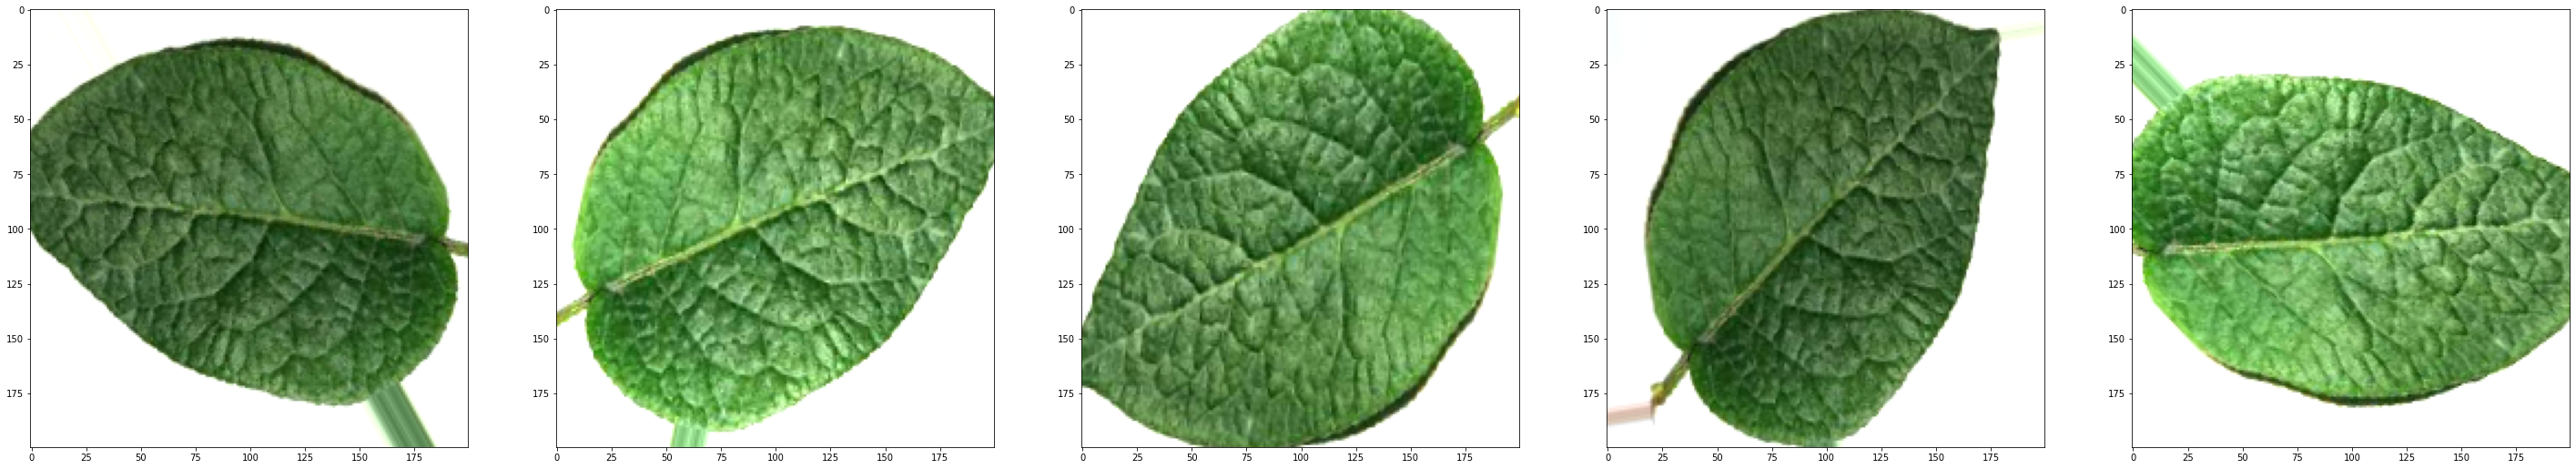

In [16]:
#Loads in image path
img = keras.preprocessing.image.load_img(image_sample_path, target_size= (200,200))
img_tensor = keras.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
#Uses ImageDataGenerator to flip the images
datagen = ImageDataGenerator(rotation_range = 45, 
                                  #width_shift_range = 0.2,
                                  #height_shift_range = 0.2,
                                  brightness_range = [1,2],
                                  zoom_range = 0.1,
                                  horizontal_flip = True,
                                  vertical_flip = True)
#Creates our batch of one image
pic = datagen.flow(img_tensor, batch_size =1)
plt.figure(figsize=(50,25))
#Plots our figures
for i in range(1,6):
  plt.subplot(1, 5, i)
  batch = pic.next()
  image_ = batch[0].astype('uint8')
  plt.imshow(image_)
plt.show()

##**PREPROCESSING DATA**

In [17]:
batch_size = 32

In [18]:

#Mengatur target size gambar berukuran sebesar 200 x 200
train_generatorDA = train_datagenDA.flow_from_directory(training_path,
                                                    classes = ['Healthy', 'Early_Blight', 'Late_Blight'],
                                                    class_mode = 'categorical',                                              
                                                    color_mode = "rgb",
                                                    batch_size = batch_size,
                                                    target_size = (200, 200),
                                                    shuffle = True)


validation_generatorDA = valid_datagenDA.flow_from_directory(validation_path,
                                                    classes = ['Healthy', 'Early_Blight', 'Late_Blight'],
                                                    class_mode = 'categorical',
                                                    color_mode = "rgb",
                                                    batch_size = batch_size,
                                                    target_size = (200, 200),
                                                    shuffle = False)

train_generatorRN = train_datagen_pi.flow_from_directory(training_path,
                                                    classes = ['Healthy', 'Early_Blight', 'Late_Blight'],
                                                    class_mode = 'categorical',                                              
                                                    color_mode = "rgb",
                                                    batch_size = batch_size,
                                                    target_size = (200, 200),
                                                    shuffle = True)

validation_generatorRN = valid_datagen_pi.flow_from_directory(validation_path,
                                                    classes = ['Healthy', 'Early_Blight', 'Late_Blight'],
                                                    class_mode = 'categorical',
                                                    color_mode = "rgb",
                                                    batch_size = batch_size,
                                                    target_size = (200, 200),
                                                    shuffle = False)

Found 2448 images belonging to 3 classes.
Found 306 images belonging to 3 classes.
Found 2448 images belonging to 3 classes.
Found 306 images belonging to 3 classes.


In [19]:
class_names = train_generatorDA.class_indices
class_names

{'Healthy': 0, 'Early_Blight': 1, 'Late_Blight': 2}

In [20]:
len(class_names)

3

##**================== INCEPTION V3 =====================**



##**INCEPTIONV3**

In [21]:
from tensorflow.keras.applications import InceptionV3
import tensorflow as tf

base_model_INCV3_V15 = InceptionV3(input_shape= (200, 200, 3),
                                include_top = False,
                                pooling = 'max',
                                weights = 'imagenet')

87910968/87910968 [==============================] - 3s 0us/step


In [22]:
for layer in base_model_INCV3_V15.layers:
  layer.trainable = False

In [23]:
base_model_INCV3_V15.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 99, 99, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 99, 99, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

In [24]:
#Flatenning 
x = layers.Flatten()(base_model_INCV3_V15.output)

#Fully Connected Layer
x = layers.Dense(512, activation='relu')(x)

#Dropout Layer
x = layers.Dropout(0.2)(x)

#menambahkan layar output dengan fungsi softmax untuk klasifikasi 
x = layers.Dense (3, activation='softmax')(x)


MODEL_INCEPTIONV3_V15 = tf.keras.models.Model(base_model_INCV3_V15.input, x)
MODEL_INCEPTIONV3_V15.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])


In [25]:
MODEL_INCEPTIONV3_V15.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 99, 99, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 99, 99, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

In [26]:
start_time = time.time()

hist_incv3DA = MODEL_INCEPTIONV3_V15.fit(train_generatorDA, validation_data = validation_generatorDA,
                 steps_per_epoch = len(train_generatorDA), epochs = 10,
                 validation_steps = len(validation_generatorDA))

print("Running time : --- %s secods ---" % (time.time() - start_time))

Epoch 1/10
77/77 [==============================] - 46s 424ms/step - loss: 1.2176 - accuracy: 0.7324 - val_loss: 0.5627 - val_accuracy: 0.7386
Epoch 2/10
77/77 [==============================] - 28s 367ms/step - loss: 0.4088 - accuracy: 0.8464 - val_loss: 0.3169 - val_accuracy: 0.8824
Epoch 3/10
77/77 [==============================] - 28s 362ms/step - loss: 0.3568 - accuracy: 0.8632 - val_loss: 0.3309 - val_accuracy: 0.8693
Epoch 4/10
77/77 [==============================] - 28s 366ms/step - loss: 0.3483 - accuracy: 0.8611 - val_loss: 0.2853 - val_accuracy: 0.8954
Epoch 5/10
77/77 [==============================] - 28s 369ms/step - loss: 0.3117 - accuracy: 0.8795 - val_loss: 0.2766 - val_accuracy: 0.9052
Epoch 6/10
77/77 [==============================] - 29s 372ms/step - loss: 0.3222 - accuracy: 0.8734 - val_loss: 0.2927 - val_accuracy: 0.8954
Epoch 7/10
77/77 [==============================] - 30s 388ms/step - loss: 0.3008 - accuracy: 0.8885 - val_loss: 0.3367 - val_accuracy: 0.8660

In [27]:
acc_loss_incV3_DA = MODEL_INCEPTIONV3_V15.evaluate(validation_generatorDA)

10/10 [==============================] - 1s 75ms/step - loss: 0.2917 - accuracy: 0.8889


In [28]:
print('Accuracy           : ', acc_loss_incV3_DA[1]*100)
print('Loss               : ', acc_loss_incV3_DA[0])

Accuracy           :  88.88888955116272
Loss               :  0.291695237159729


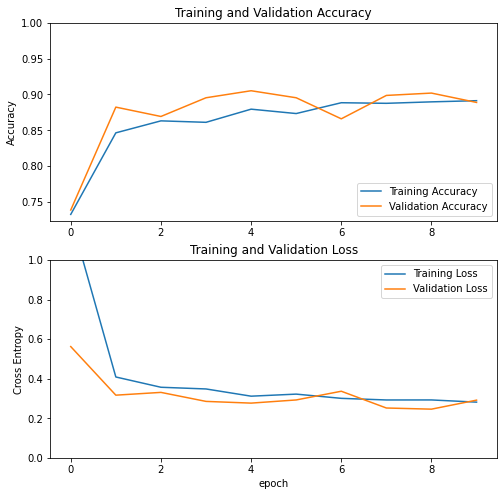

In [29]:
acc = hist_incv3DA.history['accuracy']
val_acc = hist_incv3DA.history['val_accuracy']

loss = hist_incv3DA.history['loss']
val_loss = hist_incv3DA.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

##**FINE TUNING INCEPTIONV3**

In [30]:
base_model_INCV3_V15.trainable = True

In [31]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model_INCV3_V15.layers))

Number of layers in the base model:  312


In [32]:
MODEL_INCEPTIONV3_V15.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-5),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [33]:
MODEL_INCEPTIONV3_V15.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 99, 99, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 99, 99, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

In [34]:

start_time = time.time()

fine_tune_epochs = 10
initial_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fineDA = MODEL_INCEPTIONV3_V15.fit(train_generatorDA,
                         validation_data=validation_generatorDA,
                         epochs=total_epochs,
                         steps_per_epoch = len(train_generatorDA),
                         initial_epoch=hist_incv3DA.epoch[-1],
                         validation_steps = len(validation_generatorDA)
                         )
print("Running time : --- %s secods ---" % (time.time() - start_time))

Epoch 10/20
77/77 [==============================] - 49s 447ms/step - loss: 0.5835 - accuracy: 0.7541 - val_loss: 0.2263 - val_accuracy: 0.9183
Epoch 11/20
77/77 [==============================] - 32s 417ms/step - loss: 0.3529 - accuracy: 0.8685 - val_loss: 0.2373 - val_accuracy: 0.9248
Epoch 12/20
77/77 [==============================] - 32s 413ms/step - loss: 0.2605 - accuracy: 0.9036 - val_loss: 0.2538 - val_accuracy: 0.9118
Epoch 13/20
77/77 [==============================] - 33s 433ms/step - loss: 0.2030 - accuracy: 0.9195 - val_loss: 0.2011 - val_accuracy: 0.9216
Epoch 14/20
77/77 [==============================] - 32s 413ms/step - loss: 0.1838 - accuracy: 0.9342 - val_loss: 0.1722 - val_accuracy: 0.9379
Epoch 15/20
77/77 [==============================] - 31s 404ms/step - loss: 0.1650 - accuracy: 0.9457 - val_loss: 0.1603 - val_accuracy: 0.9444
Epoch 16/20
77/77 [==============================] - 31s 401ms/step - loss: 0.1264 - accuracy: 0.9555 - val_loss: 0.1590 - val_accuracy:

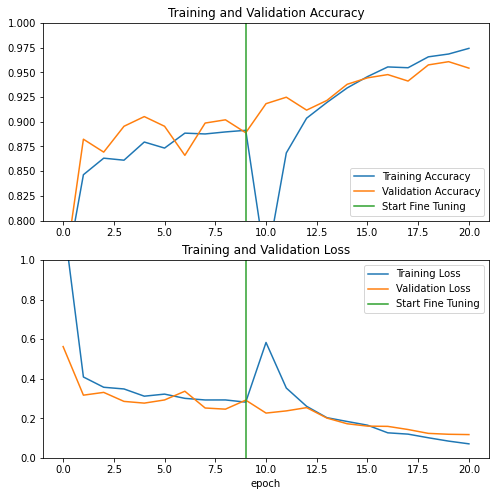

In [35]:
acc += history_fineDA.history['accuracy']
val_acc += history_fineDA.history['val_accuracy']

loss += history_fineDA.history['loss']
val_loss += history_fineDA.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [36]:
acc_loss_finetuneDA = MODEL_INCEPTIONV3_V15.evaluate(validation_generatorDA)
print('accuracy = ', acc_loss_finetuneDA[1]*100)
print('loss     = ', acc_loss_finetuneDA[0])

10/10 [==============================] - 1s 74ms/step - loss: 0.1174 - accuracy: 0.9542
accuracy =  95.42483687400818
loss     =  0.11743119359016418


##**PERBANDINGAN FASE 1 DENGAN FASE 2**

Akurasi Pada Fase 1 :  88.88888955116272
Loss Pada Fase 1    :  0.291695237159729
Akurasi Pada Fase 2 :  95.42483687400818
Loss Pada Fase 2    :  0.11743119359016418


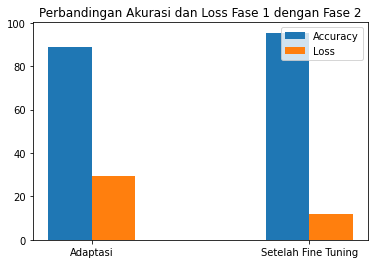

In [37]:
acc_loss_incV3_DA

print('Akurasi Pada Fase 1 : ', acc_loss_incV3_DA[1]*100)
print('Loss Pada Fase 1    : ', acc_loss_incV3_DA[0])
print('==================================================')
print('Akurasi Pada Fase 2 : ', acc_loss_finetuneDA[1]*100)
print('Loss Pada Fase 2    : ', acc_loss_finetuneDA[0])
print('==================================================')


X = ['Adaptasi','Setelah Fine Tuning']
YAccuracy = [acc_loss_incV3_DA[1]*100,acc_loss_finetuneDA[1]*100,]
ZLoss = [acc_loss_incV3_DA[0]*100,acc_loss_finetuneDA[0]*100,]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.1, YAccuracy, 0.2, label = 'Accuracy', )
plt.bar(X_axis + 0.1, ZLoss, 0.2, label = 'Loss', )
  
plt.xticks(X_axis, X)
plt.ylabel("")
plt.ylabel("")
plt.title("Perbandingan Akurasi dan Loss Fase 1 dengan Fase 2")
plt.legend(loc='upper right')
plt.show()

##**UJI DENGAN DATA TEST**

In [38]:
test_dataset = tf.keras.utils.image_dataset_from_directory(test_path,
                                                                 shuffle=True,
                                                                 batch_size=32,
                                                                 image_size=(200,200))

test_datasetDA = test_datagenDA.flow_from_directory(test_path,
                                                    classes = ['Healthy', 'Early_Blight', 'Late_Blight'],
                                                    class_mode = 'categorical',
                                                    color_mode = "rgb",
                                                    batch_size = 32,
                                                    target_size = (200, 200),
                                                    shuffle = False)

Found 306 files belonging to 3 classes.
Found 306 images belonging to 3 classes.


In [39]:
test_class_names = test_dataset.class_names
test_class_names

['Early_Blight', 'Healthy', 'Late_Blight']

In [40]:
import seaborn as sns
from sklearn.metrics import precision_score, recall_score,\
                            confusion_matrix, classification_report, \
                            accuracy_score, f1_score, plot_confusion_matrix

In [41]:
pred_INCV3_DA = np.argmax(MODEL_INCEPTIONV3_V15.predict(test_datasetDA), axis = -1)

10/10 [==============================] - 2s 76ms/step


In [42]:
def INCV3_report(predictions):
    ax = plt.subplot()
    sns.heatmap(confusion_matrix(test_datasetDA.classes,pred_INCV3_DA), annot = True, cmap="Greens", fmt='g', ax=ax)
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix INCEPTION V3');
    ax.xaxis.set_ticklabels(['Healthy', 'Early Blight', 'Late Blight']); ax.yaxis.set_ticklabels(['Healthy', 'Early Blight', 'Late Blight']);

Jumlah prediksi benar dari 306 gambar =  298
Jumlah prediksi salah dari 306 gambar =  8 



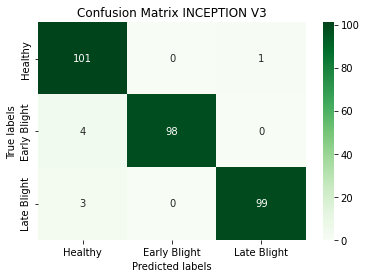

In [43]:
cm1_DA = confusion_matrix(test_datasetDA.classes, pred_INCV3_DA)
INCV3_report(pred_INCV3_DA)
benar_V1 = cm1_DA[0][0] + cm1_DA[1][1] + cm1_DA[2][2]
salah_V1 = cm1_DA[0][1] + cm1_DA[0][2] + cm1_DA[1][0] + cm1_DA[1][2] + cm1_DA[2][0] + cm1_DA[2][1] 
print('Jumlah prediksi benar dari 306 gambar = ', benar_V1)
print('Jumlah prediksi salah dari 306 gambar = ', salah_V1,'\n')

In [44]:
cm1_DA = confusion_matrix(test_datasetDA.classes, pred_INCV3_DA)

print('===================CONFUSION MATRIX INCEPTIONV3===================== \n')
print('[TP] True positive   = ', cm1_DA[0][0])
print('[FP] False positive  = ', cm1_DA[1][0] + cm1_DA[2][0])
print('[FN] False negative  = ', cm1_DA[0][1] + cm1_DA[0][2])
print('[TN] True negative   = ', cm1_DA[1][1] + cm1_DA[1][2] + cm1_DA[2][1] + cm1_DA[2][2])

TP = cm1_DA[0][0]
FP = cm1_DA[1][0] + cm1_DA[2][0]
FN = cm1_DA[0][1] + cm1_DA[0][2]
TN = cm1_DA[1][1] + cm1_DA[1][2] + cm1_DA[2][1] + cm1_DA[2][2]


Sensitivity_INCV3_DA = TP / ( TP + FN )
Specificity_INCV3_DA = TN / ( TN + FP )

print("\nSensitivity INCV3    = ", Sensitivity_INCV3_DA*100)
print("Spesificity INCV3    = ", Specificity_INCV3_DA*100)

===================CONFUSION MATRIX INCEPTIONV3===================== 

[TP] True positive   =  101
[FP] False positive  =  7
[FN] False negative  =  1
[TN] True negative   =  197

Sensitivity INCV3    =  99.01960784313727
Spesificity INCV3    =  96.56862745098039


1/1 [==============================] - 1s 1s/step
Label Images      :  Early_Blight
Prediction Result :  Early_Blight 



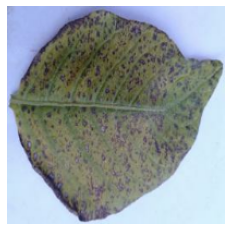

In [45]:
for images_batch, labels_batch in test_dataset.take(1):
  first_image = images_batch[1].numpy().astype('uint8')
  first_label = labels_batch[1]
  plt.imshow(first_image)
  plt.axis('off')
  batch_prediction = MODEL_INCEPTIONV3_V15.predict(images_batch)
  print('Label Images      : ', test_class_names[first_label])
  print('Prediction Result : ', test_class_names[np.argmax(batch_prediction[1])],'\n')

##**================== RESNET50 =====================**

##**RESNET50**

In [46]:
from tensorflow.keras.applications import ResNet50
import tensorflow as tf

base_model_RN50_V15 = ResNet50(input_shape= (200, 200, 3),
                                include_top = False,
                                pooling='max',
                                weights = 'imagenet')

94765736/94765736 [==============================] - 3s 0us/step


In [47]:
for layer in base_model_RN50_V15.layers:
  layer.trainable = False

In [48]:
base_model_RN50_V15.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 206, 206, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 100, 100, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [49]:
#Flatenning 
x = layers.Flatten()(base_model_RN50_V15.output)

#Fully Connected Layer
x = layers.Dense(512, activation='relu')(x)

#Dropout Layer
x = layers.Dropout(0.2)(x)

#menambahkan layar output dengan fungsi softmax untuk klasifikasi 
x = layers.Dense (3, activation='softmax')(x)


MODEL_RESNET50_V15= tf.keras.models.Model(base_model_RN50_V15.input, x)
MODEL_RESNET50_V15.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])


In [50]:
MODEL_RESNET50_V15.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 206, 206, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 100, 100, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [51]:
start_time = time.time()

hist_RN50 = MODEL_RESNET50_V15.fit(train_generatorRN, validation_data = validation_generatorRN,
                 steps_per_epoch = len(train_generatorRN), epochs = 10,
                 validation_steps = len(validation_generatorRN))

print("Running time : --- %s secods ---" % (time.time() - start_time))

Epoch 1/10
77/77 [==============================] - 36s 415ms/step - loss: 2.3120 - accuracy: 0.8305 - val_loss: 0.1428 - val_accuracy: 0.9477
Epoch 2/10
77/77 [==============================] - 29s 379ms/step - loss: 0.1629 - accuracy: 0.9477 - val_loss: 0.1322 - val_accuracy: 0.9542
Epoch 3/10
77/77 [==============================] - 29s 376ms/step - loss: 0.1173 - accuracy: 0.9596 - val_loss: 0.1170 - val_accuracy: 0.9542
Epoch 4/10
77/77 [==============================] - 29s 379ms/step - loss: 0.0980 - accuracy: 0.9702 - val_loss: 0.1330 - val_accuracy: 0.9608
Epoch 5/10
77/77 [==============================] - 29s 377ms/step - loss: 0.1169 - accuracy: 0.9555 - val_loss: 0.1054 - val_accuracy: 0.9575
Epoch 6/10
77/77 [==============================] - 29s 378ms/step - loss: 0.0750 - accuracy: 0.9743 - val_loss: 0.1360 - val_accuracy: 0.9444
Epoch 7/10
77/77 [==============================] - 29s 377ms/step - loss: 0.0921 - accuracy: 0.9665 - val_loss: 0.1137 - val_accuracy: 0.9673

In [52]:
acc_loss_rn50 = MODEL_RESNET50_V15.evaluate(validation_generatorRN)

10/10 [==============================] - 1s 101ms/step - loss: 0.1115 - accuracy: 0.9575


In [53]:
print('Accuracy           : ', acc_loss_rn50[1]*100)
print('Loss               : ', acc_loss_rn50[0])

Accuracy           :  95.75163125991821
Loss               :  0.11149974912405014


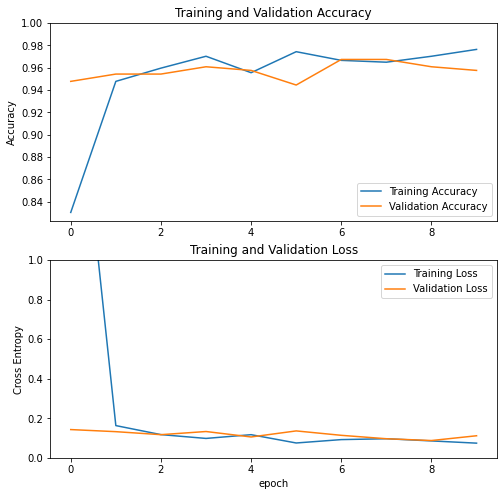

In [54]:
acc = hist_RN50.history['accuracy']
val_acc = hist_RN50.history['val_accuracy']

loss = hist_RN50.history['loss']
val_loss = hist_RN50.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

##**FINE TUNING RESNET50**

In [55]:
base_model_RN50_V15.trainable = True

In [56]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model_RN50_V15.layers))

Number of layers in the base model:  176


In [57]:
MODEL_RESNET50_V15.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-5),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [58]:
MODEL_RESNET50_V15.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 206, 206, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 100, 100, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [59]:

start_time = time.time()

fine_tune_epochs = 10
initial_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_rn50_fine = MODEL_RESNET50_V15.fit(train_generatorRN,
                         validation_data=validation_generatorRN,
                         epochs=total_epochs,
                         steps_per_epoch = len(train_generatorRN),
                         initial_epoch=hist_RN50.epoch[-1],
                         validation_steps = len(validation_generatorRN)
                         )
print("Running time : --- %s secods ---" % (time.time() - start_time))

Epoch 10/20
77/77 [==============================] - 48s 481ms/step - loss: 0.2569 - accuracy: 0.9310 - val_loss: 0.0897 - val_accuracy: 0.9739
Epoch 11/20
77/77 [==============================] - 36s 459ms/step - loss: 0.0951 - accuracy: 0.9657 - val_loss: 0.0483 - val_accuracy: 0.9837
Epoch 12/20
77/77 [==============================] - 36s 463ms/step - loss: 0.0731 - accuracy: 0.9779 - val_loss: 0.0482 - val_accuracy: 0.9837
Epoch 13/20
77/77 [==============================] - 36s 460ms/step - loss: 0.0729 - accuracy: 0.9820 - val_loss: 0.0466 - val_accuracy: 0.9804
Epoch 14/20
77/77 [==============================] - 36s 459ms/step - loss: 0.0591 - accuracy: 0.9804 - val_loss: 0.0454 - val_accuracy: 0.9869
Epoch 15/20
77/77 [==============================] - 37s 478ms/step - loss: 0.0445 - accuracy: 0.9865 - val_loss: 0.0375 - val_accuracy: 0.9869
Epoch 16/20
77/77 [==============================] - 36s 461ms/step - loss: 0.0341 - accuracy: 0.9898 - val_loss: 0.0259 - val_accuracy:

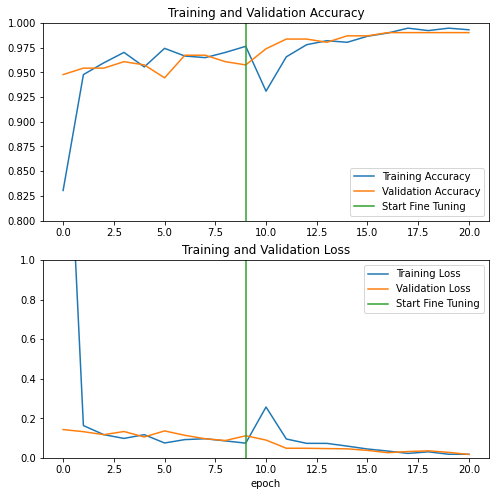

In [60]:
acc += history_rn50_fine.history['accuracy']
val_acc += history_rn50_fine.history['val_accuracy']

loss += history_rn50_fine.history['loss']
val_loss += history_rn50_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [61]:
acc_loss_rn50_finetuneDA = MODEL_RESNET50_V15.evaluate(validation_generatorRN)
print('accuracy = ', acc_loss_rn50_finetuneDA[1]*100)
print('loss     = ', acc_loss_rn50_finetuneDA[0])

10/10 [==============================] - 1s 103ms/step - loss: 0.0170 - accuracy: 0.9902
accuracy =  99.01960492134094
loss     =  0.016990138217806816


##**PERBANDINGAN FASE 1 DENGAN FASE 2**

Akurasi Pada Fase 1 :  95.75163125991821
Loss Pada Fase 1    :  0.11149974912405014
Akurasi Pada Fase 2 :  99.01960492134094
Loss Pada Fase 2    :  0.016990138217806816


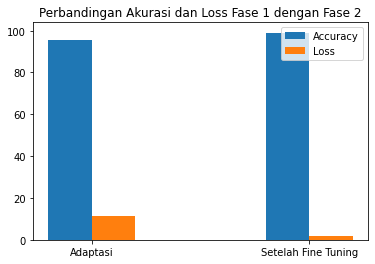

In [62]:
acc_loss_rn50

print('Akurasi Pada Fase 1 : ', acc_loss_rn50[1]*100)
print('Loss Pada Fase 1    : ', acc_loss_rn50[0])
print('==================================================')
print('Akurasi Pada Fase 2 : ', acc_loss_rn50_finetuneDA[1]*100)
print('Loss Pada Fase 2    : ', acc_loss_rn50_finetuneDA[0])
print('==================================================')


X = ['Adaptasi','Setelah Fine Tuning']
YAccuracy = [acc_loss_rn50[1]*100,acc_loss_rn50_finetuneDA[1]*100,]
ZLoss = [acc_loss_rn50[0]*100,acc_loss_rn50_finetuneDA[0]*100,]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.1, YAccuracy, 0.2, label = 'Accuracy', )
plt.bar(X_axis + 0.1, ZLoss, 0.2, label = 'Loss', )
  
plt.xticks(X_axis, X)
plt.ylabel("")
plt.ylabel("")
plt.title("Perbandingan Akurasi dan Loss Fase 1 dengan Fase 2")
plt.legend(loc='upper right')
plt.show()

##**UJI DENGAN DATA TEST**

In [63]:
test_dataset = tf.keras.utils.image_dataset_from_directory(test_path,
                                                                 shuffle=False,
                                                                 batch_size=32,
                                                                 image_size=(200,200))

test_datasetRN = test_datagen_pi.flow_from_directory(test_path,
                                                    classes = ['Healthy', 'Early_Blight', 'Late_Blight'],
                                                    class_mode = 'categorical',
                                                    color_mode = "rgb",
                                                    batch_size = 32,
                                                    target_size = (200, 200),
                                                    shuffle = False)

Found 306 files belonging to 3 classes.
Found 306 images belonging to 3 classes.


In [64]:
test_class_names = test_dataset.class_names
test_class_names

['Early_Blight', 'Healthy', 'Late_Blight']

In [65]:
import seaborn as sns
from sklearn.metrics import precision_score, recall_score,\
                            confusion_matrix, classification_report, \
                            accuracy_score, f1_score, plot_confusion_matrix

In [66]:
pred_RN50 = np.argmax(MODEL_RESNET50_V15.predict(test_datasetRN), axis = -1)

10/10 [==============================] - 2s 101ms/step


In [67]:
def RESNET50_report(predictions):
    ax = plt.subplot()
    sns.heatmap(confusion_matrix(test_datasetRN.classes,pred_RN50), annot = True, cmap="Greens", fmt='g', ax=ax)
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix RESNET50');
    ax.xaxis.set_ticklabels(['Healthy', 'Early Blight', 'Late Blight']); ax.yaxis.set_ticklabels(['Healthy', 'Early Blight', 'Late Blight']);

Jumlah prediksi benar dari 306 gambar =  302
Jumlah prediksi salah dari 306 gambar =  4 



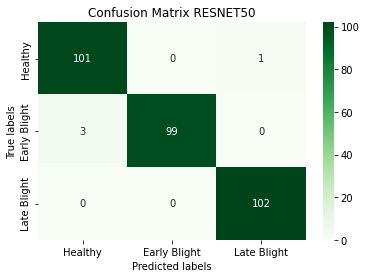

In [68]:
cm2_DA = confusion_matrix(test_datasetRN.classes, pred_RN50)
RESNET50_report(pred_RN50)
benar_V2 = cm2_DA[0][0] + cm2_DA[1][1] + cm2_DA[2][2]
salah_V2 = cm2_DA[0][1] + cm2_DA[0][2] + cm2_DA[1][0] + cm2_DA[1][2] + cm2_DA[2][0] + cm2_DA[2][1] 
print('Jumlah prediksi benar dari 306 gambar = ', benar_V2)
print('Jumlah prediksi salah dari 306 gambar = ', salah_V2,'\n')

In [69]:
cm2_DA = confusion_matrix(test_datasetRN.classes, pred_RN50)

print('===================CONFUSION MATRIX RESNET50===================== \n')
print('[TP] True positive   = ', cm2_DA[0][0])
print('[FP] False positive  = ', cm2_DA[1][0] + cm2_DA[2][0])
print('[FN] False negative  = ', cm2_DA[0][1] + cm2_DA[0][2])
print('[TN] True negative   = ', cm2_DA[1][1] + cm2_DA[1][2] + cm2_DA[2][1] + cm2_DA[2][2])

TP = cm2_DA[0][0]
FP = cm2_DA[1][0] + cm2_DA[2][0]
FN = cm2_DA[0][1] + cm2_DA[0][2]
TN = cm2_DA[1][1] + cm2_DA[1][2] + cm2_DA[2][1] + cm2_DA[2][2]


Sensitivity_RN50_DA = TP / ( TP + FN )
Specificity_RN50_DA = TN / ( TN + FP )

print("\nSensitivity INCV3    = ", Sensitivity_RN50_DA*100)
print("Spesificity INCV3    = ", Specificity_RN50_DA*100)

===================CONFUSION MATRIX RESNET50===================== 

[TP] True positive   =  101
[FP] False positive  =  3
[FN] False negative  =  1
[TN] True negative   =  201

Sensitivity INCV3    =  99.01960784313727
Spesificity INCV3    =  98.52941176470588


1/1 [==============================] - 1s 848ms/step
Label Images      :  Early_Blight
Prediction Result :  Early_Blight 



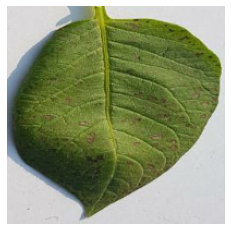

In [70]:
for images_batch, labels_batch in test_dataset.take(1):
  first_image = images_batch[0].numpy().astype('uint8')
  first_label = labels_batch[0]
  plt.imshow(first_image)
  plt.axis('off')
  batch_prediction = MODEL_RESNET50_V15.predict(images_batch)
  print('Label Images      : ', test_class_names[first_label])
  print('Prediction Result : ', test_class_names[np.argmax(batch_prediction[0])],'\n')

##**================== VGG19 =====================**

##**VGG19**

In [71]:
from tensorflow.keras.applications import VGG19
import tensorflow as tf

base_model_VGG19_V15 = VGG19(input_shape= (200, 200, 3),
                                include_top = False,
                                pooling = 'max',
                                weights = 'imagenet')

80134624/80134624 [==============================] - 3s 0us/step


In [72]:
for layer in base_model_VGG19_V15.layers:
  layer.trainable = False

In [73]:
base_model_VGG19_V15.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0     

In [74]:
#Flatenning 
x = layers.Flatten()(base_model_VGG19_V15.output)

#Fully Connected Layer
x = layers.Dense(512, activation='relu')(x)

#Dropout Layer
x = layers.Dropout(0.2)(x)

#menambahkan layar output dengan fungsi softmax untuk klasifikasi 
x = layers.Dense (3, activation='softmax')(x)


MODEL_VGG19_V15 = tf.keras.models.Model(base_model_VGG19_V15.input, x)
MODEL_VGG19_V15.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])


In [75]:
MODEL_VGG19_V15.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0   

In [76]:
start_time = time.time()

hist_VGG19 = MODEL_VGG19_V15.fit(train_generatorDA, validation_data = validation_generatorDA,
                 steps_per_epoch = len(train_generatorDA), epochs = 10,
                 validation_steps = len(validation_generatorDA))

print("Running time : --- %s secods ---" % (time.time() - start_time))

Epoch 1/10
77/77 [==============================] - 38s 447ms/step - loss: 0.7783 - accuracy: 0.6528 - val_loss: 0.6925 - val_accuracy: 0.7092
Epoch 2/10
77/77 [==============================] - 33s 421ms/step - loss: 0.5951 - accuracy: 0.7426 - val_loss: 0.8570 - val_accuracy: 0.6275
Epoch 3/10
77/77 [==============================] - 31s 408ms/step - loss: 0.5320 - accuracy: 0.7847 - val_loss: 0.6652 - val_accuracy: 0.7320
Epoch 4/10
77/77 [==============================] - 31s 405ms/step - loss: 0.4825 - accuracy: 0.8084 - val_loss: 0.6090 - val_accuracy: 0.7614
Epoch 5/10
77/77 [==============================] - 31s 403ms/step - loss: 0.4869 - accuracy: 0.8076 - val_loss: 0.5667 - val_accuracy: 0.7680
Epoch 6/10
77/77 [==============================] - 31s 403ms/step - loss: 0.4449 - accuracy: 0.8252 - val_loss: 0.5432 - val_accuracy: 0.7843
Epoch 7/10
77/77 [==============================] - 31s 403ms/step - loss: 0.4268 - accuracy: 0.8333 - val_loss: 0.5243 - val_accuracy: 0.8039

In [77]:
acc_loss_vgg19 = MODEL_VGG19_V15.evaluate(validation_generatorDA)


10/10 [==============================] - 2s 171ms/step - loss: 0.5152 - accuracy: 0.7974


In [78]:
print('Accuracy           : ', acc_loss_vgg19[1]*100)
print('Loss               : ', acc_loss_vgg19[0])

Accuracy           :  79.73856329917908
Loss               :  0.5152232646942139


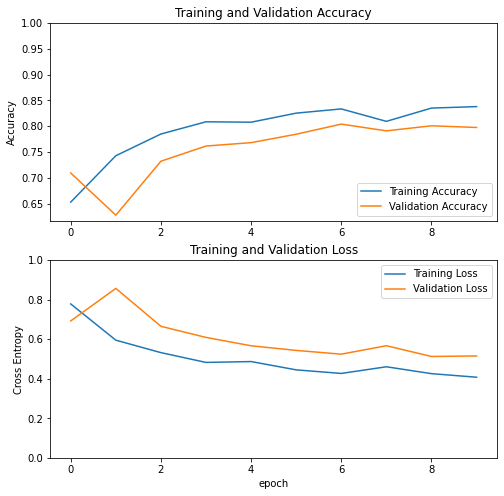

In [79]:
acc = hist_VGG19.history['accuracy']
val_acc = hist_VGG19.history['val_accuracy']

loss = hist_VGG19.history['loss']
val_loss = hist_VGG19.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

##**FINE TUNING VGG19**

In [80]:
base_model_VGG19_V15.trainable = True

In [81]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model_VGG19_V15.layers))

Number of layers in the base model:  23


In [82]:
MODEL_VGG19_V15.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-5),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [83]:
MODEL_VGG19_V15.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0   

In [84]:

start_time = time.time()

fine_tune_epochs = 10
initial_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_vgg19_fine = MODEL_VGG19_V15.fit(train_generatorDA,
                         validation_data=validation_generatorDA,
                         epochs=total_epochs,
                         steps_per_epoch = len(train_generatorDA),
                         initial_epoch=hist_VGG19.epoch[-1],
                         validation_steps = len(validation_generatorDA)
                         )
print("Running time : --- %s secods ---" % (time.time() - start_time))

Epoch 10/20
77/77 [==============================] - 47s 542ms/step - loss: 0.2590 - accuracy: 0.9048 - val_loss: 0.1864 - val_accuracy: 0.9150
Epoch 11/20
77/77 [==============================] - 40s 519ms/step - loss: 0.1076 - accuracy: 0.9665 - val_loss: 0.1316 - val_accuracy: 0.9444
Epoch 12/20
77/77 [==============================] - 40s 509ms/step - loss: 0.0681 - accuracy: 0.9792 - val_loss: 0.1040 - val_accuracy: 0.9608
Epoch 13/20
77/77 [==============================] - 40s 511ms/step - loss: 0.0583 - accuracy: 0.9841 - val_loss: 0.0898 - val_accuracy: 0.9739
Epoch 14/20
77/77 [==============================] - 41s 525ms/step - loss: 0.0305 - accuracy: 0.9882 - val_loss: 0.1090 - val_accuracy: 0.9608
Epoch 15/20
77/77 [==============================] - 39s 509ms/step - loss: 0.0336 - accuracy: 0.9894 - val_loss: 0.0669 - val_accuracy: 0.9771
Epoch 16/20
77/77 [==============================] - 40s 511ms/step - loss: 0.0233 - accuracy: 0.9931 - val_loss: 0.0821 - val_accuracy:

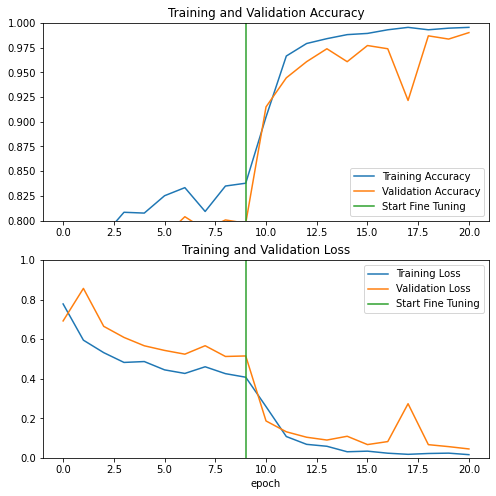

In [85]:
acc += history_vgg19_fine.history['accuracy']
val_acc += history_vgg19_fine.history['val_accuracy']

loss += history_vgg19_fine.history['loss']
val_loss += history_vgg19_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [86]:
acc_loss_vgg19_finetuneDA = MODEL_VGG19_V15.evaluate(validation_generatorDA)
print('accuracy = ', acc_loss_vgg19_finetuneDA[1]*100)
print('loss     = ', acc_loss_vgg19_finetuneDA[0])

10/10 [==============================] - 2s 169ms/step - loss: 0.0448 - accuracy: 0.9902
accuracy =  99.01960492134094
loss     =  0.04477681219577789


##**PERBANDINGAN FASE 1 DENGAN FASE 2**

Akurasi Pada Fase 1 :  79.73856329917908
Loss Pada Fase 1    :  0.5152232646942139
Akurasi Pada Fase 2 :  99.01960492134094
Loss Pada Fase 2    :  0.04477681219577789


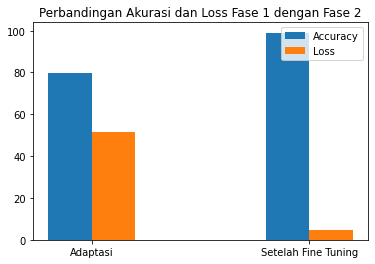

In [87]:
acc_loss_vgg19

print('Akurasi Pada Fase 1 : ', acc_loss_vgg19[1]*100)
print('Loss Pada Fase 1    : ', acc_loss_vgg19[0])
print('==================================================')
print('Akurasi Pada Fase 2 : ', acc_loss_vgg19_finetuneDA[1]*100)
print('Loss Pada Fase 2    : ', acc_loss_vgg19_finetuneDA[0])
print('==================================================')


X = ['Adaptasi','Setelah Fine Tuning']
YAccuracy = [acc_loss_vgg19[1]*100,acc_loss_vgg19_finetuneDA[1]*100,]
ZLoss = [acc_loss_vgg19[0]*100,acc_loss_vgg19_finetuneDA[0]*100,]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.1, YAccuracy, 0.2, label = 'Accuracy', )
plt.bar(X_axis + 0.1, ZLoss, 0.2, label = 'Loss', )
  
plt.xticks(X_axis, X)
plt.ylabel("")
plt.ylabel("")
plt.title("Perbandingan Akurasi dan Loss Fase 1 dengan Fase 2")
plt.legend(loc='upper right')
plt.show()

##**UJI DENGAN DATA TEST**

In [108]:
test_dataset = tf.keras.utils.image_dataset_from_directory(test_path,
                                                                 shuffle=True,
                                                                 batch_size=32,
                                                                 image_size=(200,200))

test_datasetDA = test_datagenDA.flow_from_directory(test_path,
                                                    classes = ['Healthy', 'Early_Blight', 'Late_Blight'],
                                                    class_mode = 'categorical',
                                                    color_mode = "rgb",
                                                    batch_size = 32,
                                                    target_size = (200, 200),
                                                    shuffle = False)

Found 306 files belonging to 3 classes.
Found 306 images belonging to 3 classes.


In [89]:
test_class_names = test_dataset.class_names
test_class_names

['Early_Blight', 'Healthy', 'Late_Blight']

In [90]:
import seaborn as sns
from sklearn.metrics import precision_score, recall_score,\
                            confusion_matrix, classification_report, \
                            accuracy_score, f1_score, plot_confusion_matrix

In [91]:
pred_VGG19 = np.argmax(MODEL_VGG19_V15.predict(test_datasetDA), axis = -1)

10/10 [==============================] - 2s 167ms/step


In [92]:
def VGG19_report(predictions):
    ax = plt.subplot()
    sns.heatmap(confusion_matrix(test_datasetDA.classes,pred_VGG19), annot = True, cmap="Greens", fmt='g', ax=ax)
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix VGG19');
    ax.xaxis.set_ticklabels(['Healthy', 'Early Blight', 'Late Blight']); ax.yaxis.set_ticklabels(['Healthy', 'Early Blight', 'Late Blight']);

Jumlah prediksi benar dari 306 gambar =  304
Jumlah prediksi salah dari 306 gambar =  2 



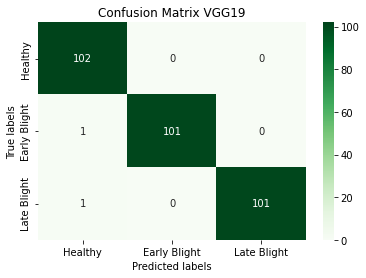

In [93]:
cm3_DA = confusion_matrix(test_datasetDA.classes, pred_VGG19)
VGG19_report(pred_VGG19)
benar_V3 = cm3_DA[0][0] + cm3_DA[1][1] + cm3_DA[2][2]
salah_V3 = cm3_DA[0][1] + cm3_DA[0][2] + cm3_DA[1][0] + cm3_DA[1][2] + cm3_DA[2][0] + cm3_DA[2][1] 
print('Jumlah prediksi benar dari 306 gambar = ', benar_V3)
print('Jumlah prediksi salah dari 306 gambar = ', salah_V3,'\n')

In [97]:
cm3_DA = confusion_matrix(test_datasetDA.classes, pred_VGG19)

print('===================CONFUSION MATRIX VGG19===================== \n')
print('[TP] True positive   = ', cm3_DA[0][0])
print('[FP] False positive  = ', cm3_DA[1][0] + cm3_DA[2][0])
print('[FN] False negative  = ', cm3_DA[0][1] + cm3_DA[0][2])
print('[TN] True negative   = ', cm3_DA[1][1] + cm3_DA[1][2] + cm3_DA[2][1] + cm3_DA[2][2])

TP = cm3_DA[0][0]
FP = cm3_DA[1][0] + cm3_DA[2][0]
FN = cm3_DA[0][1] + cm3_DA[0][2]
TN = cm3_DA[1][1] + cm3_DA[1][2] + cm3_DA[2][1] + cm3_DA[2][2]


Sensitivity_VGG19_DA = TP / ( TP + FN )
Specificity_VGG19_DA = TN / ( TN + FP )

print("\nSensitivity INCV3    = ", Sensitivity_VGG19_DA*100)
print("Spesificity INCV3    = ", Specificity_VGG19_DA*100)

===================CONFUSION MATRIX VGG19===================== 

[TP] True positive   =  102
[FP] False positive  =  2
[FN] False negative  =  0
[TN] True negative   =  202

Sensitivity INCV3    =  100.0
Spesificity INCV3    =  99.01960784313727


1/1 [==============================] - 0s 25ms/step
Label Images      :  Late_Blight
Prediction Result :  Late_Blight 



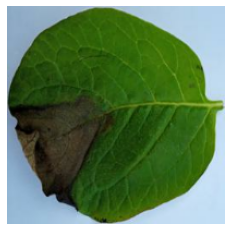

In [113]:
for images_batch, labels_batch in test_dataset.take(1):
  first_image = images_batch[0].numpy().astype('uint8')
  first_label = labels_batch[0]
  plt.imshow(first_image)
  plt.axis('off')
  batch_prediction = MODEL_VGG19_V15.predict(images_batch)
  print('Label Images      : ', test_class_names[first_label])
  print('Prediction Result : ', test_class_names[np.argmax(batch_prediction[0])],'\n')

##**PERBANDINGAN KE 3 MODEL**

In [124]:
model_inceptionV3 = acc_loss_incV3_DA
print('Akurasi InceptionV3  = ',model_inceptionV3[1]*100)
print('Loss Inception V3    = ',model_inceptionV3[0],'\n')

model_resnet50 = acc_loss_rn50
print('Akurasi ResNet50     = ',model_resnet50[1]*100)
print('Loss ResNet50        = ',model_resnet50[0],'\n')

model_vgg19 = acc_loss_vgg19
print('Akurasi VGG19        = ',model_vgg19[1]*100)
print('Loss VGG19           = ',model_vgg19[0],'\n')

print('================ SETELAH FINE-TUNING ==================''\n')

model_inceptionV3_ft = acc_loss_finetuneDA
print('Akurasi InceptionV3  = ', model_inceptionV3_ft[1]*100)
print('Loss InceptionV3     = ', model_inceptionV3_ft[0],'\n')

model_resnet50_ft = acc_loss_rn50_finetuneDA
print('Akurasi ResNet50     = ', model_resnet50_ft[1]*100)
print('Loss ResNet50        = ', model_resnet50_ft[0],'\n')

model_vgg19_ft = acc_loss_vgg19_finetuneDA
print('Akurasi VGG19        = ', model_vgg19_ft[1]*100)
print('Loss VGG19           = ', model_vgg19_ft[0],'\n')


Akurasi InceptionV3  =  88.88888955116272
Loss Inception V3    =  0.291695237159729 

Akurasi ResNet50     =  95.75163125991821
Loss ResNet50        =  0.11149974912405014 

Akurasi VGG19        =  79.73856329917908
Loss VGG19           =  0.5152232646942139 

================ SETELAH FINE-TUNING ==================

Akurasi InceptionV3  =  95.42483687400818
Loss InceptionV3     =  0.11743119359016418 

Akurasi ResNet50     =  99.01960492134094
Loss ResNet50        =  0.016990138217806816 

Akurasi VGG19        =  99.01960492134094
Loss VGG19           =  0.04477681219577789 



##**SAVE MODEL**

In [96]:
MODEL_INCEPTIONV3_V15.save('3CLASS_InceptionV3.hdf5')
MODEL_RESNET50_V15.save('3CLASS_ResNet50.hdf5')
MODEL_VGG19_V15.save('3CLASS_VGG19.hdf5')